# Part II - San Francisco Bay Area Bike System Exploration
## by Ukachi Agnes Eze-Mbey



## Investigation Overview

To draw insights from the data, I made use of the three (3) different levels of visualizations:

a. univariate, by the way of histograms (for numerical variables), pie charts, and bar charts (for qualitative factors)


b. bivariate, in form of scatter plots, clustered bar charts, and box plots to see the relationship between two sets of variables


c. multivariate plots, such as adapted heatmaps, clusterd bar charts and a correlation matrix



## Dataset Overview

> The dataset analyzed includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains start and end station of the bikes, start and end time of sharing, information on whether the user is a customer or susbcriber to the system, member gender and year of birth.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style = 'whitegrid')
%matplotlib inline
import math as mth

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_go_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_go_bike = ford_go_bike.dropna() 
ford_go_bike.isnull().sum()
ford_go_bike['member_birth_year'] = ford_go_bike.member_birth_year.astype(int) 
#extract year from start and end time
ford_go_bike['year'] = pd.DatetimeIndex(ford_go_bike['start_time']).year 
ford_go_bike['end_year'] = pd.DatetimeIndex(ford_go_bike['end_time']).year
#extract start month from start time and end time
ford_go_bike['start_month'] = pd.DatetimeIndex(ford_go_bike['start_time']).month_name() 
ford_go_bike['end_month'] = pd.DatetimeIndex(ford_go_bike['end_time']).month_name() 
#extract start day from start time and end time
ford_go_bike['start_day'] = pd.DatetimeIndex(ford_go_bike['start_time']).day_name() 
ford_go_bike['end_day'] = pd.DatetimeIndex(ford_go_bike['end_time']).day_name()

ford_go_bike['age'] = ford_go_bike.year - ford_go_bike.member_birth_year 
ford_go_bike['duration_sec'] = ford_go_bike.duration_sec.apply(lambda x: '{:.2f}'.format(x/60))
ford_go_bike.rename(columns = {'duration_sec' : 'time_interval_min'}, inplace = True)
ford_go_bike['time_interval_min'] = ford_go_bike.time_interval_min.astype(float)

ford_go_bike_ = ford_go_bike[['bike_id', 'user_type', 'member_gender',  'age','start_station_name', 'end_station_name','start_day'
                            ,'start_month', 'end_day','end_month', 'time_interval_min', 'bike_share_for_all_trip']]
ford_go_bike_.head()

,bike_id,user_type,member_gender,age,start_station_name,end_station_name,start_day,start_month,end_day,end_month,time_interval_min,bike_share_for_all_trip
0,4902,Customer,Male,35,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Thursday,February,Friday,March,869.75,No
2,5905,Customer,Male,47,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Thursday,February,Friday,March,1030.90,No
3,6638,Subscriber,Other,30,Grove St at Masonic Ave,Central Ave at Fell St,Thursday,February,Friday,March,608.17,No
4,4898,Subscriber,Male,45,Frank H Ogawa Plaza,10th Ave at E 15th St,Thursday,February,Friday,March,26.42,Yes
5,5200,Subscriber,Male,60,4th St at Mission Bay Blvd S,Broadway at Kearny,Thursday,February,Friday,March,29.88,No


## Visualization 1

User type ratio: 90.5% of the users are subscribers while less than than 10% are customers

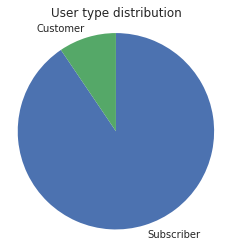

## Visualization 2
Gender Distribution: 23.3% of the users are female, 74.6 % are male and 2.1% other


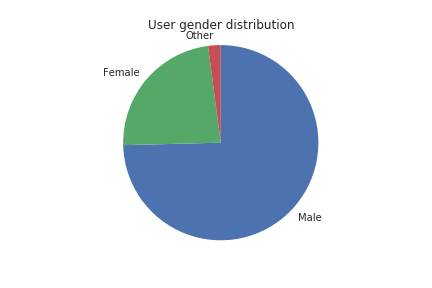

## Visualization 3
User-Gender Distribution: 91.2%(119007)of the male users are subscribers while 88.7%(36182) of the female users are subscribers



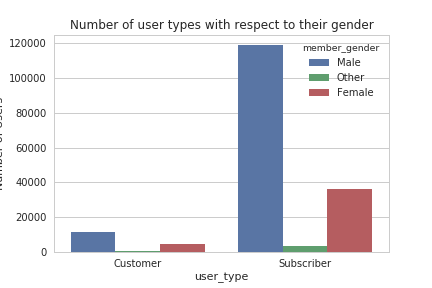

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 330429 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 